## On Balance Volume

$$
\mbox{OBV}_t = \mbox{OBV}_{t-1} + 
\begin{cases}
V_t &, & \mbox{if } C_t > C_{t-1} \\
0 &, & \mbox{if } C_t = C_{t-1} \\ 
-V_t & , & \mbox{if } C_t < C_{t-1}
\end{cases}
$$

### Documentation

On Balance Volume (OBV)는 거래량을 기반으로 한 기술적 분석 지표로, 주식의 가격 움직임에 대한 거래량의 변화를 추적하여 주식의 상승 또는 하락 추세를 예측하는 데 사용된다. 이 지표는 1963년 조셉 그랜빌에 의해 소개되었으며, 시장 참여자들의 행동과 시장의 힘을 보여주는 것으로 간주된다.

이렇게 계산된 OBV는 가격 변동에 대한 거래량의 누적 합계를 나타내며, OBV의 변화는 종종 가격 변화를 선행하거나 확인하는 신호로 해석된다. OBV의 상승은 매수 압력이 증가하고 있음을 나타내며, 주가 상승을 예측할 수 있다. 반대로, OBV의 하락은 매도 압력이 증가하고 있음을 나타내며, 주가 하락을 예측할 수 있다.

OBV를 사용할 때는 단순히 OBV의 절대값보다는 OBV의 변화 추세를 주시하는 것이 중요하다. OBV의 상승 추세는 강세 신호로, 하락 추세는 약세 신호로 간주될 수 있다. 또한 OBV가 새로운 고점 또는 저점을 형성할 때 주가도 유사한 패턴을 보여야 한다. 만약 OBV가 새로운 고점을 형성하는데 주가가 그렇지 않다면, 이는 잠재적인 강세 다이버전스로 해석될 수 있으며, 주가가 추후 상승할 가능성이 높다는 신호로 볼 수 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import on_balance_volume
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
obv = on_balance_volume(
    close = data['Close'],
    volume = data['Volume'],
    fillna = False
)

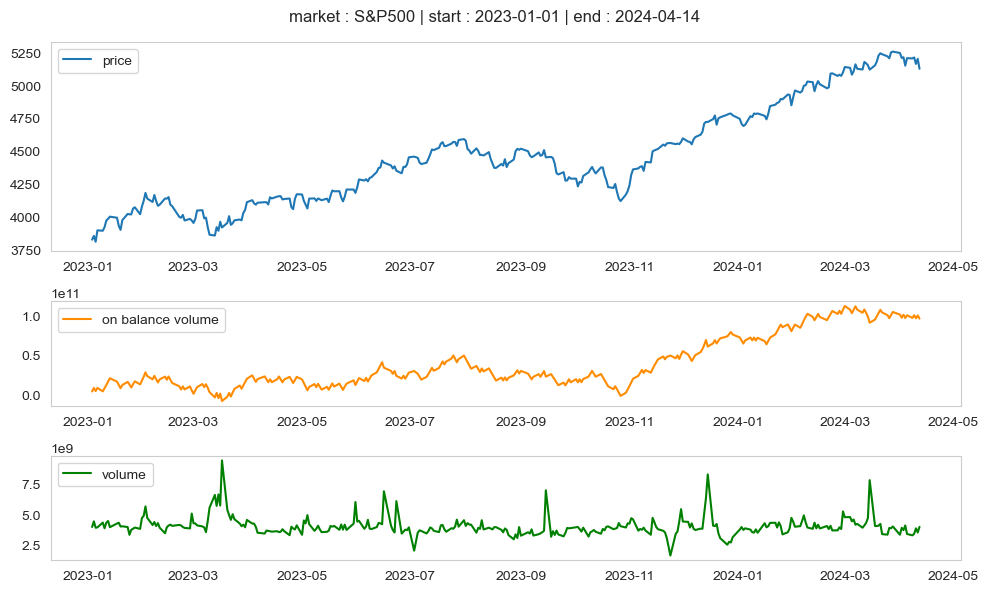

In [5]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(obv, color = 'darkorange')
plt.grid(False)
plt.legend(['on balance volume'])

plt.subplot(gs[2])
plt.plot(data['Volume'], color = 'green')
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()